In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

class particle(object):
    
    def __init__(self, m, x=0., y=0., vx=0., vy=0., Fx=0., Fy=0., KE=0.):
        self.m = m
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.Fx=Fx 
        self.Fy=Fx
        self.KE=KE
    
    def get_Forces(self, Vo, a):
        r=self.get_r()
        factor=24*Vo*(-3*a**6/r**7+1/r**4)*a**6
        self.Fx=factor*self.x
        self.Fy=factor*self.y
        
    def get_r(self):
        return math.sqrt(self.x**2+self.y**2)
    
    def update_E(self):
        self.KE=.5*self.m*(self.vx**2+self.vy**2)

    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.omega = self.omega + f/self.mass*dt
        self.theta = self.theta + self.omega*dt

                
    def verlet(self, Vo, a, dt):
        self.update_E()
        self.get_Forces(Vo, a)
        self.x += self.vx*dt +.5*self.Fx/self.m*dt**2
        self.y += self.vy*dt + .5*self.Fy/self.m*dt**2
        self.vx += .5*self.Fx/self.m*dt
        self.vy += .5*self.Fy/self.m*dt
        self.get_Forces(Vo, a)
        self.vx += .5*self.Fx/self.m*dt
        self.vy += .5*self.Fy/self.m*dt


-1.54477767561
0.0286350486616
0.0320090119363
0.043745765757


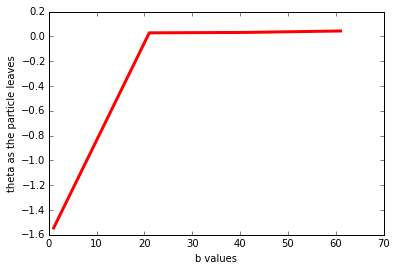

In [2]:
#Now we will run an actual simulation
db = 20.             
bo=1.
bmax = 100.
bsteps = int((bmax-bo)/db)

dt = 0.001
tmax = 1000.
tsteps = int(tmax/dt) 

Eo=3.
rmax=1000.

a=1.
Vo=1.

#This version let's you look at specifc trajectories as over time and at different bs for a fixed Energy
ts = np.zeros(shape=(bsteps,tsteps))
xs = np.zeros(shape=(bsteps,tsteps))
ys = np.zeros(shape=(bsteps,tsteps))
vxs = np.zeros(shape=(bsteps,tsteps))
vys = np.zeros(shape=(bsteps,tsteps))
Es = np.zeros(shape=(bsteps,tsteps))
bs=np.zeros(shape=(bsteps))
thetas=np.zeros(shape=(bsteps))

m=1. #defines masses and starting positions, start along x axis for circular orbits

b=bo
for n in range(0, bsteps):
    p=particle(m, -rmax, b, math.sqrt(2*Eo/m), 0., 0., 0., Eo)
    for i in range(0, tsteps):
            xs[n,i] = p.x
            ys[n,i] = p.y
            vxs[n,i]= p.vx
            vys[n,i]= p.vy
            Es[n,i] = p.KE
            ts[n,i]=i*dt
            p.verlet(Vo, a, dt)
    thetas[n]=math.atan(p.y/p.x)
    print(thetas[n])
    bs[n]=b
    b+=db
 

pyplot.plot(bs, thetas, color="#FF0000", ls='-', lw=3)

#pyplot.plot(xs[0,:], ys[0,:], color="red", ls='-', lw=3)
#pyplot.plot(xs[1,:], ys[1,:], color="blue", ls='-', lw=3)

pyplot.xlabel('b values')
pyplot.ylabel('theta as the particle leaves');

Next we will s a comparision of two of the trajectories. In the $\phi=0$ plane.

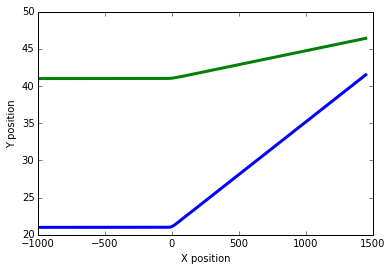

In [5]:
#pyplot.plot(xs[0,:], ys[0,:], color="red", ls='-', lw=3)
pyplot.plot(xs[1,:], ys[1,:], color="blue", ls='-', lw=3)
pyplot.plot(xs[2,:], ys[2,:], color="green", ls='-', lw=3)

pyplot.xlabel('X position')
pyplot.ylabel('Y position');


In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

class particle(object):
    
    def __init__(self, m, x=0., y=0., vx=0., vy=0., Fx=0., Fy=0., KE=0.):
        self.m = m
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.Fx=Fx
        self.Fy=Fx
        self.KE=KE
    
    def get_Forces(self, Vo, a):
        r=self.get_r()
        factor=24*Vo*(-3*a**6/r**7+1/r**4)*a**6
        self.Fx=factor*self.x
        self.Fy=factor*self.y
        
    def get_r(self):
        return math.sqrt(self.x**2+self.y**2)

    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.omega = self.omega + f/self.mass*dt
        self.theta = self.theta + self.omega*dt

                
    def verlet(self, Vo, a, dt):
        self.get_Forces(Vo, a)
        self.x += self.vx*dt +.5*self.Fx/self.m*dt**2
        self.y += self.vy*dt + .5*self.Fy/self.m*dt**2
        self.vx += .5*self.Fx/self.m*dt
        self.vy += .5*self.Fy/self.m*dt
        self.get_Forces(Vo, a)
        self.vx += .5*self.Fx/self.m*dt
        self.vy += .5*self.Fy/self.m*dt


db = 1.             
bo=1.
bmax = 10.
bsteps = int((bmax-bo)/db)

dt = 0.001
tmax = 1000.
tsteps = int(tmax/dt)


rstart=-1000.

#this version lets you cycle over a series of energies and b values but does not save individual trajectories
a=1.
Vo=10.
Emin=.1*Vo
Emax=100.*Vo


bs=np.zeros(shape=(4,bsteps))
thetas=np.zeros(shape=(4,bsteps))

m=1. #defines masses and starting positions, start along x axis for circular orbits

for epsilon in range(0,4):
    Eo=Emin*10**epsilon
    b=bo
    for n in range(0, bsteps):
        p=particle(m, rstart, b, math.sqrt(2*Eo/m), 0., 0., 0.)
        for i in range(0, tsteps):
            p.verlet(Vo, a, dt) #simply running verlet modeling to get final results without saving individual runs
        thetas[epsilon,n]=math.atan(p.y/p.x)
        #print(thetas[epsilon,n])
        bs[epsilon,n]=b
        b+=db


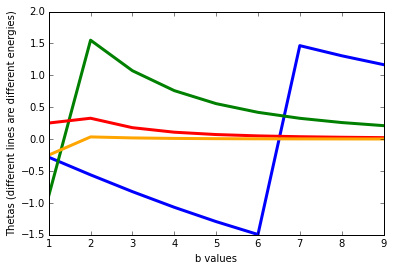

In [8]:
pyplot.plot(bs[0,:], thetas[0,:], color="blue", ls='-', lw=3)
pyplot.plot(bs[1,:], thetas[1,:], color="green", ls='-', lw=3)
pyplot.plot(bs[2,:], thetas[2,:], color="red", ls='-', lw=3)
pyplot.plot(bs[3,:], thetas[3,:], color="orange", ls='-', lw=3)

pyplot.xlabel('b values')
pyplot.ylabel('Thetas (different lines are different energies)');

Here we can see the final thetas at a range of energies. Each line here differs by an order of magnitude. Lower energies have slightly different behavior (blue for instance). In this trace we can see reflection of the particle for low enough b values. Eventually though as b increases it reaches a crtical point and drastically changes due to the orbiting phenomenon before hitting high enough b values that it can escape the potential's influence with only slight attenuation. 

In [9]:
#Cross Section Calculator
dsigmas=np.zeros(shape=(4,bsteps-1))
averagethetas=np.zeros(shape=(4,bsteps-1))

for epsilon in range(0,4):
    b=bo
    for n in range(1, bsteps):
        averagethetas[epsilon,n-1]=(thetas[epsilon,n]+thetas[epsilon,n-1])/2
        averageb=(bs[epsilon,n]+bs[epsilon,n-1])/2
        f=math.fabs(db/(thetas[epsilon,n]-thetas[epsilon,n-1]))
        dsigmas[epsilon,n-1]=averageb/math.sin(averagethetas[epsilon,n-1])*f
        b+=db

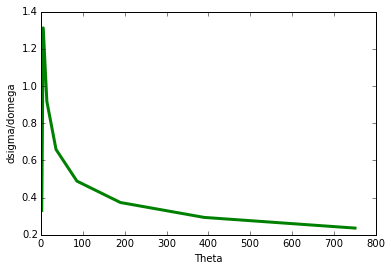

In [16]:
pyplot.plot(dsigmas[1,:], averagethetas[1,:], color="green", ls='-', lw=3)
#pyplot.plot(dsigmas[2,:], averagethetas[2,:], color="red", ls='-', lw=3)
#pyplot.plot(dsigmas[3,:], averagethetas[3,:], color="orange", ls='-', lw=3)

pyplot.xlabel('Theta')
pyplot.ylabel('dsigma/domega');

Above we see an example of a scattering cross section vs theta graph. Due to the different ranges involved it is only possible to really inspect one such graph at a time. 